In [1]:
from pathlib import Path
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
num = "6"

df1 = f"15RAW_{num}.csv"
df2 = f"6RAW_{num}.csv"
merged_df_name = f"merged_df_{num}.csv"

In [3]:
# read the data from the data_nick dir
data_dir = Path("__file__").parent / "data_nick"
# read the csv files
data_15RAW = pd.read_csv(data_dir / df1)
data_6RAW = pd.read_csv(data_dir / df2)

In [4]:
data_15RAW.head()

,Relative Time,Date,Time Stamp Local,F-o,Psi-o,GPM-o,F-i,Psi-i,Chn 1 Events
0,0.00,4/14/2023,1:54:10 PM,78.382095,13.827393,2.814484,74.396126,15.430145,NaN
1,0.01,4/14/2023,1:54:10 PM,78.382095,13.834473,2.806549,74.396126,15.408020,NaN
2,0.02,4/14/2023,1:54:10 PM,78.382095,13.961914,2.812500,74.396126,15.403595,NaN
3,0.03,4/14/2023,1:54:10 PM,78.382095,13.876953,2.811310,74.396126,15.469971,NaN
4,0.04,4/14/2023,1:54:10 PM,78.382095,13.898193,2.807343,74.396126,15.483246,NaN


In [5]:
# Combine 'Date' and 'Time Stamp Local' columns into a single datetime column
data_15RAW['Datetime'] = pd.to_datetime(data_15RAW['Date'] + ' ' + data_15RAW['Time Stamp Local'])

# Convert the 'Datetime' column to Unix timestamps (integer number of seconds)
data_15RAW['Unix Timestamp'] = data_15RAW['Datetime'].astype('int64') // 10**9

# Drop unnecessary columns
data_15RAW.drop(columns=['Date', 'Time Stamp Local'], inplace=True)

C:\Users\atashne\AppData\Local\Temp\ipykernel_17544\2048758935.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_15RAW['Datetime'] = pd.to_datetime(data_15RAW['Date'] + ' ' + data_15RAW['Time Stamp Local'])


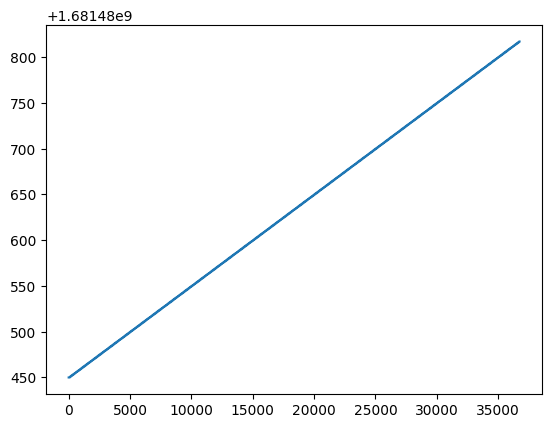

In [6]:
plt.plot(data_15RAW['Unix Timestamp'])

In [7]:
data_15RAW.head()

,Relative Time,F-o,Psi-o,GPM-o,F-i,Psi-i,Chn 1 Events,Datetime,Unix Timestamp
0,0.00,78.382095,13.827393,2.814484,74.396126,15.430145,NaN,2023-04-14 13:54:10,1681480450
1,0.01,78.382095,13.834473,2.806549,74.396126,15.408020,NaN,2023-04-14 13:54:10,1681480450
2,0.02,78.382095,13.961914,2.812500,74.396126,15.403595,NaN,2023-04-14 13:54:10,1681480450
3,0.03,78.382095,13.876953,2.811310,74.396126,15.469971,NaN,2023-04-14 13:54:10,1681480450
4,0.04,78.382095,13.898193,2.807343,74.396126,15.483246,NaN,2023-04-14 13:54:10,1681480450


In [8]:
data_6RAW.head()

,Time,Current (Filtered)_Time*,Current (Filtered)
0,04/14/2023 01:53:41.601 PM,0.00,0.148522
1,04/14/2023 01:53:42.601 PM,0.01,0.297044
2,04/14/2023 01:53:43.601 PM,0.02,0.445567
3,04/14/2023 01:53:44.601 PM,0.03,0.594089
4,04/14/2023 01:53:45.601 PM,0.04,0.742611


In [9]:
# Convert the 'Time' column to datetime format
data_6RAW['Time'] = pd.to_datetime(data_6RAW['Time'], format='%m/%d/%Y %I:%M:%S.%f %p')

# Convert the 'Time' column to Unix timestamps (integer number of seconds)
data_6RAW['Unix Timestamp'] = data_6RAW['Time'].astype('int64') // 10**9

In [10]:
data_6RAW.head()

,Time,Current (Filtered)_Time*,Current (Filtered),Unix Timestamp
0,2023-04-14 13:53:41.601,0.00,0.148522,1681480421
1,2023-04-14 13:53:42.601,0.01,0.297044,1681480422
2,2023-04-14 13:53:43.601,0.02,0.445567,1681480423
3,2023-04-14 13:53:44.601,0.03,0.594089,1681480424
4,2023-04-14 13:53:45.601,0.04,0.742611,1681480425


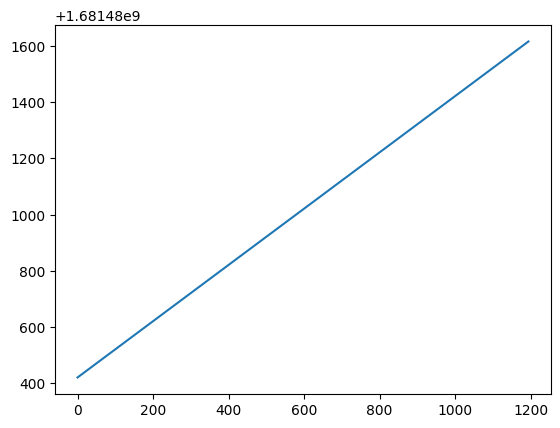

In [11]:
plt.plot(data_6RAW['Unix Timestamp'])

In [12]:
data_15RAW.head(3)

,Relative Time,F-o,Psi-o,GPM-o,F-i,Psi-i,Chn 1 Events,Datetime,Unix Timestamp
0,0.00,78.382095,13.827393,2.814484,74.396126,15.430145,NaN,2023-04-14 13:54:10,1681480450
1,0.01,78.382095,13.834473,2.806549,74.396126,15.408020,NaN,2023-04-14 13:54:10,1681480450
2,0.02,78.382095,13.961914,2.812500,74.396126,15.403595,NaN,2023-04-14 13:54:10,1681480450


In [13]:
data_6RAW.head(3)

,Time,Current (Filtered)_Time*,Current (Filtered),Unix Timestamp
0,2023-04-14 13:53:41.601,0.00,0.148522,1681480421
1,2023-04-14 13:53:42.601,0.01,0.297044,1681480422
2,2023-04-14 13:53:43.601,0.02,0.445567,1681480423


In [14]:
data_15RAW["Unix Timestamp"].describe().T

count    3.674800e+04
mean     1.681481e+09
std      1.060840e+02
min      1.681480e+09
25%      1.681481e+09
50%      1.681481e+09
75%      1.681481e+09
max      1.681481e+09
Name: Unix Timestamp, dtype: float64

In [15]:
min_data_15RAW = data_15RAW["Unix Timestamp"].describe()["min"]
max_data_15RAW = data_15RAW["Unix Timestamp"].describe()["max"]

min_data_6RAW = data_6RAW["Unix Timestamp"].describe()["min"]
max_data_6RAW = data_6RAW["Unix Timestamp"].describe()["max"]
print("min_data_6RAW - min_data_15RAW = ", (min_data_6RAW - min_data_15RAW)/60, "min")
print("max_data_6RAW - max_data_15RAW = ", (max_data_6RAW - max_data_15RAW)/60, "min")


print("data_15RAW Timestamp min = ", data_15RAW["Unix Timestamp"].describe()["min"])
print("data_15RAW Timestamp max = ", data_15RAW["Unix Timestamp"].describe()["max"], "\n")
print("data_6RAW Timestamp min = ", data_6RAW["Unix Timestamp"].describe()["min"])
print("data_6RAW Timestamp max = ", data_6RAW["Unix Timestamp"].describe()["max"])

min_data_6RAW - min_data_15RAW =  -0.48333333333333334 min
max_data_6RAW - max_data_15RAW =  13.3 min
data_15RAW Timestamp min =  1681480450.0
data_15RAW Timestamp max =  1681480817.0 

data_6RAW Timestamp min =  1681480421.0
data_6RAW Timestamp max =  1681481615.0


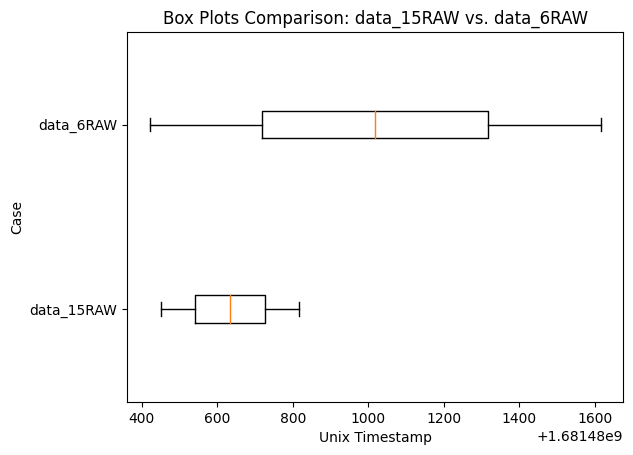

In [16]:
# Combine the data from both DataFrames into a list for the boxplot function
data = [data_15RAW["Unix Timestamp"], data_6RAW["Unix Timestamp"]]

# Create a figure
fig, ax = plt.subplots()

# Plot the box plots side by side with custom labels for the y-axis
ax.boxplot(data, vert=False, labels=["data_15RAW", "data_6RAW"])

# Set the title and labels
ax.set_title("Box Plots Comparison: data_15RAW vs. data_6RAW")
ax.set_xlabel("Unix Timestamp")
ax.set_ylabel("Case")

# Show the plot
plt.show()

In [17]:
# Calculate the average of each feature in data1
averages_data1 = data_15RAW.groupby('Unix Timestamp').mean()

# Merge the averages into data2 based on Unix Timestamp
merged_df = data_6RAW.merge(averages_data1, on='Unix Timestamp', suffixes=('_data2', '_data1'))


In [18]:
merged_df

,Time,Current (Filtered)_Time*,Current (Filtered),Unix Timestamp,Relative Time,F-o,Psi-o,GPM-o,F-i,Psi-i,Chn 1 Events,Datetime
0,2023-04-14 13:54:10.601,0.29,3.118966,1681480450,0.495,78.461814,13.884883,2.810469,74.421038,15.428375,NaN,2023-04-14 13:54:10.000000000
1,2023-04-14 13:54:11.601,0.30,3.118966,1681480451,1.495,78.558972,13.884458,2.810453,74.475845,15.426472,NaN,2023-04-14 13:54:10.999999744
2,2023-04-14 13:54:12.601,0.31,3.118966,1681480452,2.495,78.531569,13.889626,2.810433,74.411073,15.432535,NaN,2023-04-14 13:54:12.000000000
3,2023-04-14 13:54:13.601,0.32,3.118966,1681480453,3.495,78.506657,13.880352,2.810409,74.433494,15.430632,NaN,2023-04-14 13:54:13.000000000
4,2023-04-14 13:54:14.601,0.33,3.118966,1681480454,4.495,78.474271,13.882830,2.810425,74.413564,15.426915,NaN,2023-04-14 13:54:14.000000000
...,...,...,...,...,...,...,...,...,...,...,...,...
363,2023-04-14 14:00:13.601,3.92,4.139650,1681480813,363.495,99.271066,16.439941,3.952710,83.531469,19.509996,NaN,2023-04-14 14:00:13.000000256
364,2023-04-14 14:00:14.601,3.93,4.139368,1681480814,364.495,99.273557,16.463164,3.949460,83.566346,19.503801,NaN,2023-04-14 14:00:14.000000000
365,2023-04-14 14:00:15.601,3.94,4.135286,1681480815,365.495,99.029416,16.442419,3.952547,83.568838,19.502650,NaN,2023-04-14 14:00:15.000000000
366,2023-04-14 14:00:16.601,3.95,4.136195,1681480816,366.495,98.872469,16.455447,3.943855,83.593750,19.509155,NaN,2023-04-14 14:00:16.000000000


In [19]:
merged_df

,Time,Current (Filtered)_Time*,Current (Filtered),Unix Timestamp,Relative Time,F-o,Psi-o,GPM-o,F-i,Psi-i,Chn 1 Events,Datetime
0,2023-04-14 13:54:10.601,0.29,3.118966,1681480450,0.495,78.461814,13.884883,2.810469,74.421038,15.428375,NaN,2023-04-14 13:54:10.000000000
1,2023-04-14 13:54:11.601,0.30,3.118966,1681480451,1.495,78.558972,13.884458,2.810453,74.475845,15.426472,NaN,2023-04-14 13:54:10.999999744
2,2023-04-14 13:54:12.601,0.31,3.118966,1681480452,2.495,78.531569,13.889626,2.810433,74.411073,15.432535,NaN,2023-04-14 13:54:12.000000000
3,2023-04-14 13:54:13.601,0.32,3.118966,1681480453,3.495,78.506657,13.880352,2.810409,74.433494,15.430632,NaN,2023-04-14 13:54:13.000000000
4,2023-04-14 13:54:14.601,0.33,3.118966,1681480454,4.495,78.474271,13.882830,2.810425,74.413564,15.426915,NaN,2023-04-14 13:54:14.000000000
...,...,...,...,...,...,...,...,...,...,...,...,...
363,2023-04-14 14:00:13.601,3.92,4.139650,1681480813,363.495,99.271066,16.439941,3.952710,83.531469,19.509996,NaN,2023-04-14 14:00:13.000000256
364,2023-04-14 14:00:14.601,3.93,4.139368,1681480814,364.495,99.273557,16.463164,3.949460,83.566346,19.503801,NaN,2023-04-14 14:00:14.000000000
365,2023-04-14 14:00:15.601,3.94,4.135286,1681480815,365.495,99.029416,16.442419,3.952547,83.568838,19.502650,NaN,2023-04-14 14:00:15.000000000
366,2023-04-14 14:00:16.601,3.95,4.136195,1681480816,366.495,98.872469,16.455447,3.943855,83.593750,19.509155,NaN,2023-04-14 14:00:16.000000000


In [20]:
# save the output as csv file
merged_df.to_csv(data_dir / merged_df_name)

In [21]:
merged_df.shape

(368, 12)